In [1]:
%cd ..

/Users/Michael/PythonProjects/upwork-insights


/opt/homebrew/Caskroom/miniconda/base/envs/upwork/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from src.data.feature_processors.ppa import PCAWithPreProcessing
from src.vis.embeddings_dimensionality_reduction import calculate_and_save_embeddings, fit_dimensionality_reduction_methods, visualize_variances

In [3]:
input_path = 'data/clean/clean.csv'
df = pd.read_csv(input_path)

/var/folders/39/7p_9gmm53l15x4p__jk4rxxr0000gn/T/ipykernel_76753/4227245565.py:2: DtypeWarning: Columns (10,12,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


In [4]:
input_path = 'data/clean/clean.csv'
output_dir = 'data/embeddings'
save_dir = 'eval/embeddings_dimensionality_reduction'

text_columns = ['title', 'description', 'company_name', 'company_description', 'company_summary']
missing_columns = [ column for column in text_columns if not os.path.exists(os.path.join(output_dir, f"{column}_embeddings.parquet"))]
methods = {
    'PCA': PCA(n_components=3072),
    'PCAWithPreProcessing (normalize)': PCAWithPreProcessing(n_components=3072, preprocessing_method='normalize'),
    'PCAWithPreProcessing (standardize)': PCAWithPreProcessing(n_components=3072,
                                                               preprocessing_method='standardize'),
}


if missing_columns:
    calculate_and_save_embeddings(input_path, output_dir, missing_columns)

In [5]:
sample_mask = np.zeros(64619, dtype=bool)
sample_mask[:6144] = True
np.random.shuffle(sample_mask)

sample_mask = np.ones(64619, dtype=bool)

[24-01-2025 15:57:27][INFO] - Fitting method PCA
[24-01-2025 15:58:13][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCA_title_64619.pkl
[24-01-2025 15:58:13][INFO] - Fitting method PCAWithPreProcessing (normalize)
[24-01-2025 15:58:55][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (normalize)_title_64619.pkl
[24-01-2025 15:58:55][INFO] - Fitting method PCAWithPreProcessing (standardize)
[24-01-2025 15:59:37][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (standardize)_title_64619.pkl


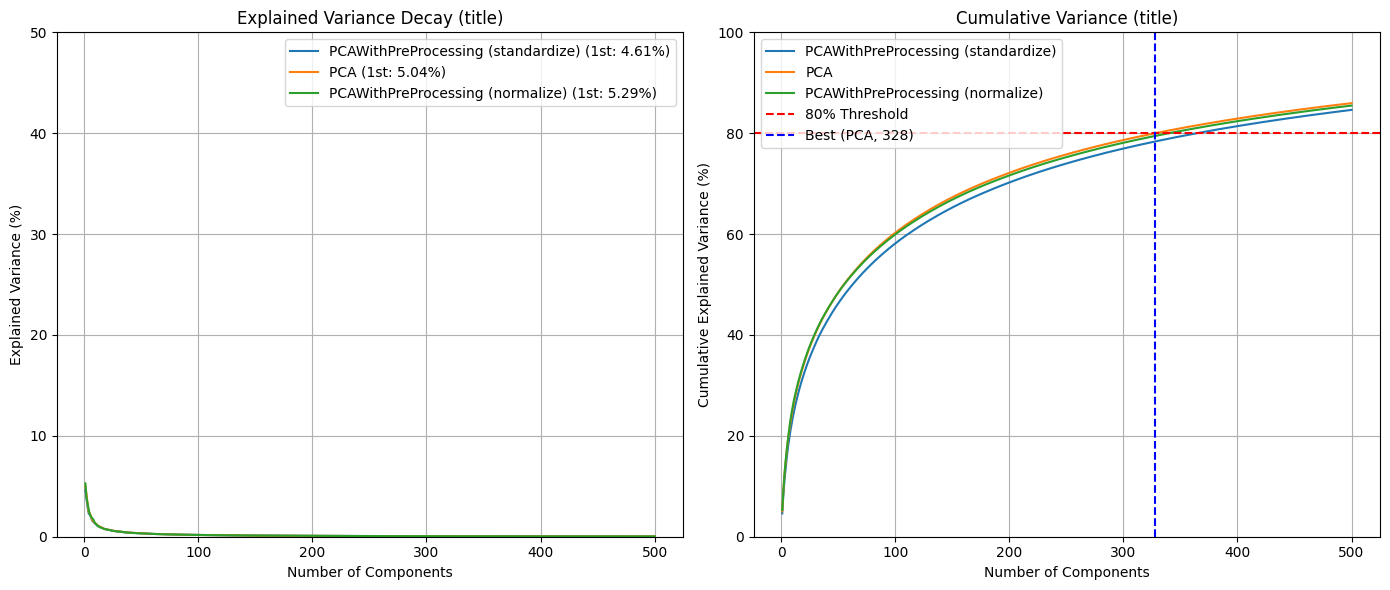

In [6]:
title_df = pd.read_parquet(os.path.join(output_dir, 'title_embeddings.parquet')).iloc[sample_mask]
explained_variances, cumulative_variances = fit_dimensionality_reduction_methods(title_df, 'title', methods, save_dir)
visualize_variances(explained_variances, cumulative_variances, feature_name="title")

[24-01-2025 15:59:39][INFO] - Fitting method PCA
[24-01-2025 16:00:24][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCA_description_64619.pkl
[24-01-2025 16:00:24][INFO] - Fitting method PCAWithPreProcessing (normalize)
[24-01-2025 16:01:08][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (normalize)_description_64619.pkl
[24-01-2025 16:01:08][INFO] - Fitting method PCAWithPreProcessing (standardize)
[24-01-2025 16:01:56][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (standardize)_description_64619.pkl


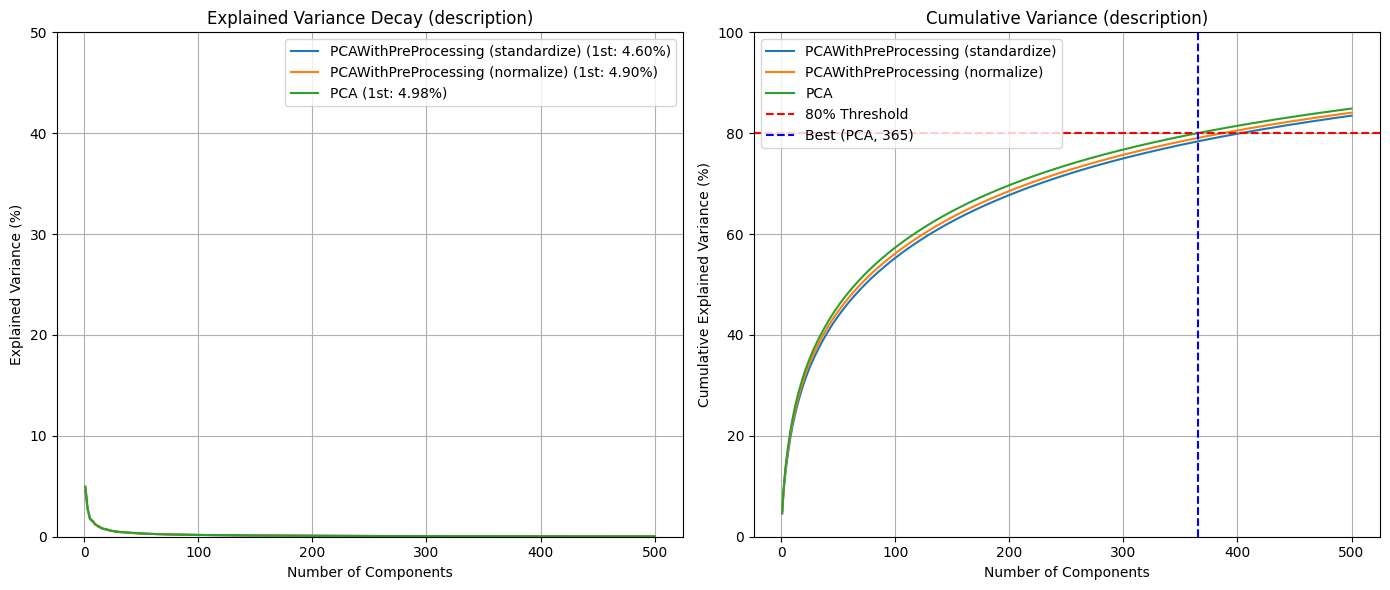

In [7]:
description_df = pd.read_parquet(os.path.join(output_dir, 'description_embeddings.parquet'))[sample_mask]
explained_variances, cumulative_variances = fit_dimensionality_reduction_methods(description_df, 'description', methods, save_dir)
visualize_variances(explained_variances, cumulative_variances, feature_name="description")

[24-01-2025 16:01:57][INFO] - Fitting method PCA
[24-01-2025 16:02:43][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCA_company_name_64619.pkl
[24-01-2025 16:02:43][INFO] - Fitting method PCAWithPreProcessing (normalize)
[24-01-2025 16:03:25][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (normalize)_company_name_64619.pkl
[24-01-2025 16:03:25][INFO] - Fitting method PCAWithPreProcessing (standardize)
[24-01-2025 16:04:24][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (standardize)_company_name_64619.pkl


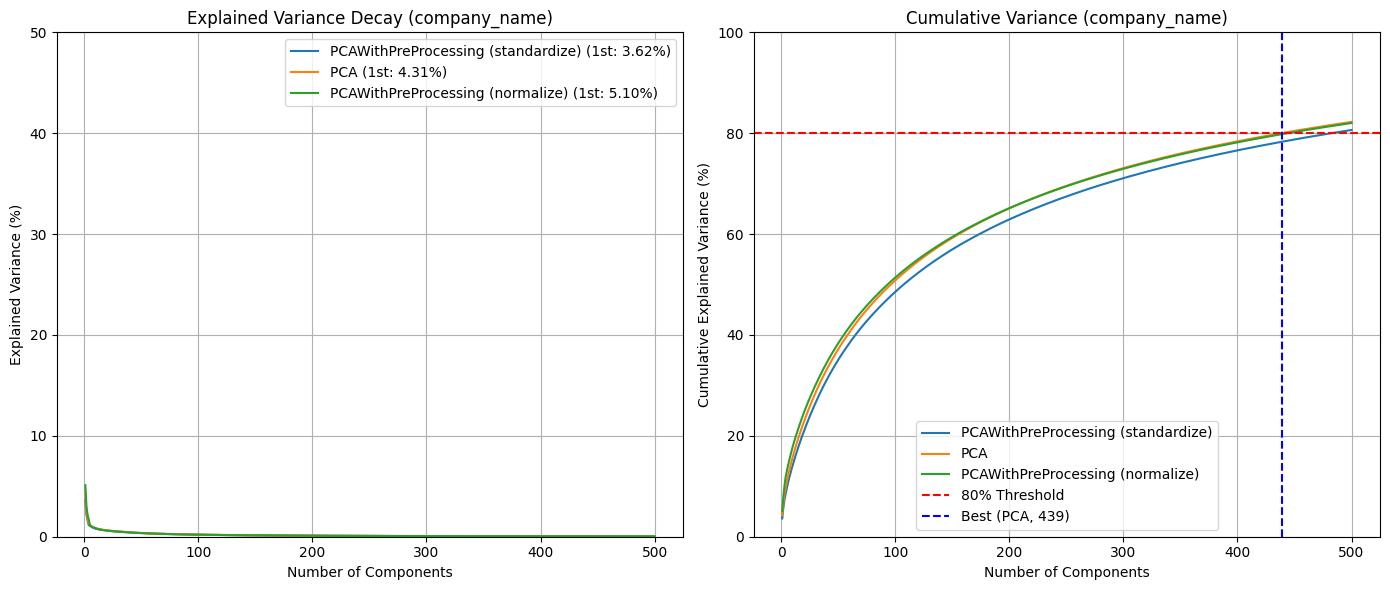

In [8]:
company_name_df = pd.read_parquet(os.path.join(output_dir, 'company_name_embeddings.parquet'))[sample_mask]
explained_variances, cumulative_variances = fit_dimensionality_reduction_methods(company_name_df, 'company_name', methods, save_dir)
visualize_variances(explained_variances, cumulative_variances, feature_name="company_name")

[24-01-2025 16:04:25][INFO] - Fitting method PCA
[24-01-2025 16:05:13][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCA_company_description_64619.pkl
[24-01-2025 16:05:13][INFO] - Fitting method PCAWithPreProcessing (normalize)
[24-01-2025 16:06:03][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (normalize)_company_description_64619.pkl
[24-01-2025 16:06:03][INFO] - Fitting method PCAWithPreProcessing (standardize)
[24-01-2025 16:06:52][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (standardize)_company_description_64619.pkl


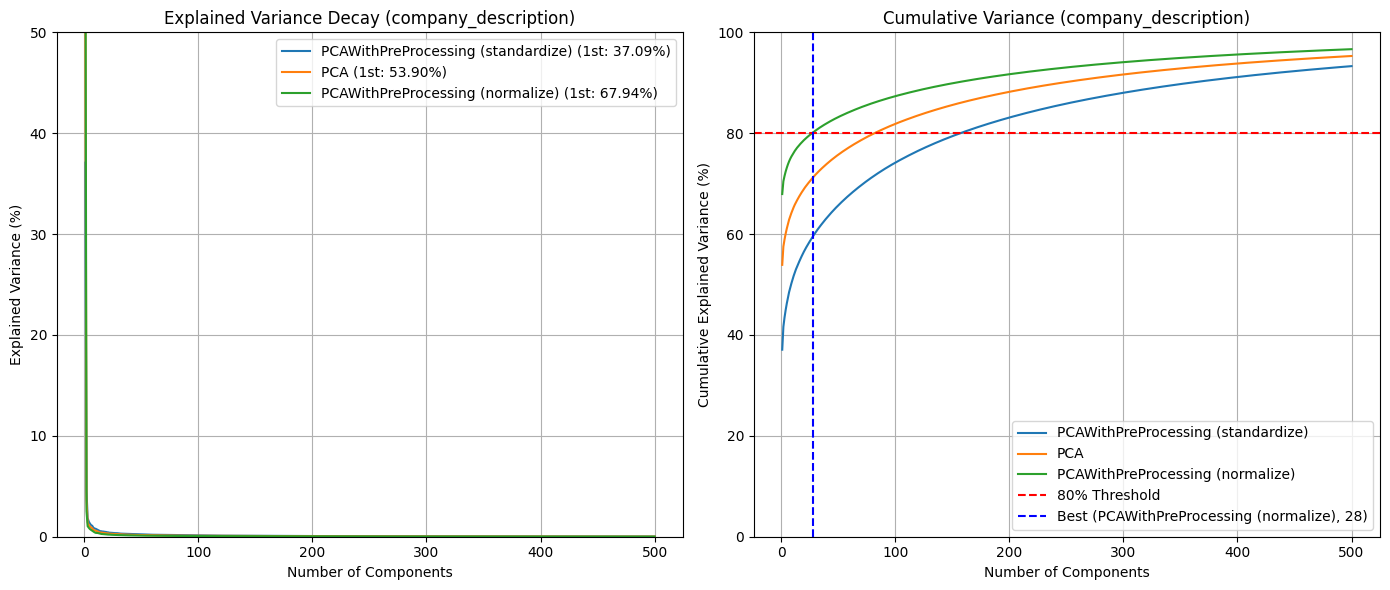

In [9]:
company_description_df = pd.read_parquet(os.path.join(output_dir, 'company_description_embeddings.parquet'))[sample_mask]
explained_variances, cumulative_variances = fit_dimensionality_reduction_methods(company_description_df, 'company_description', methods, save_dir)
visualize_variances(explained_variances, cumulative_variances, feature_name="company_description")

[24-01-2025 16:06:53][INFO] - Fitting method PCA
[24-01-2025 16:07:49][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCA_company_summary_64619.pkl
[24-01-2025 16:07:49][INFO] - Fitting method PCAWithPreProcessing (normalize)
[24-01-2025 16:08:44][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (normalize)_company_summary_64619.pkl
[24-01-2025 16:08:44][INFO] - Fitting method PCAWithPreProcessing (standardize)
[24-01-2025 16:09:45][INFO] - Model saved to eval/embeddings_dimensionality_reduction/PCAWithPreProcessing (standardize)_company_summary_64619.pkl


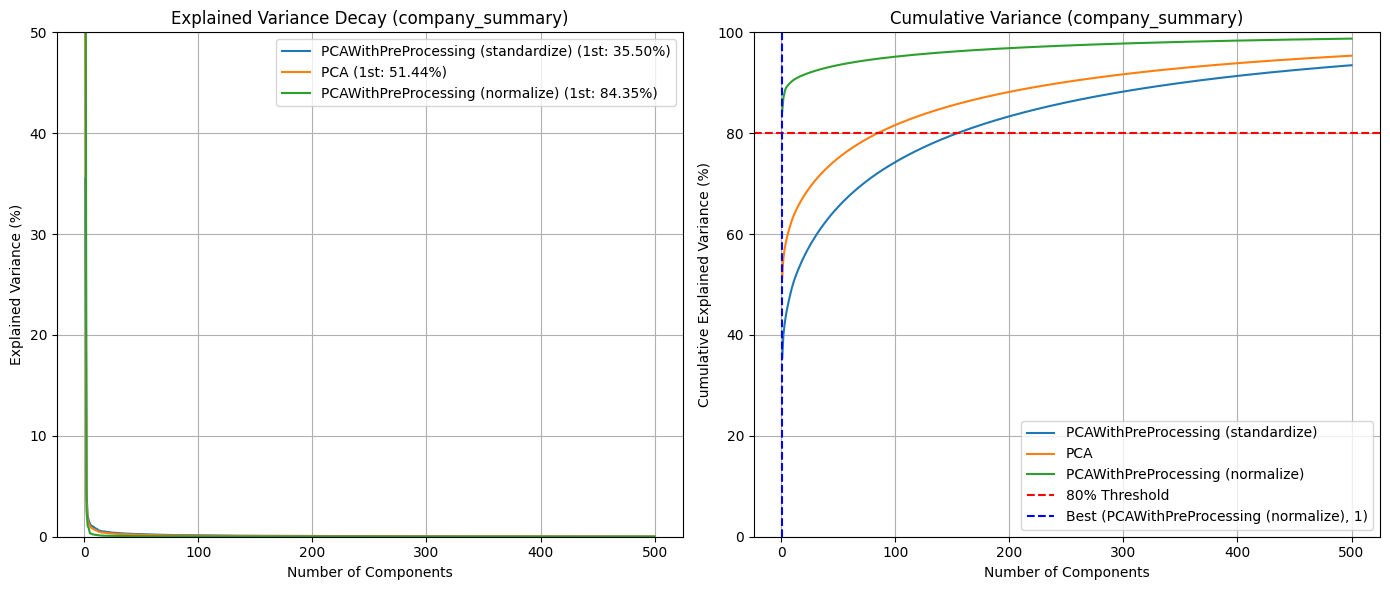

In [10]:
company_summary_df = pd.read_parquet(os.path.join(output_dir, 'company_summary_embeddings.parquet'))[sample_mask]
explained_variances, cumulative_variances = fit_dimensionality_reduction_methods(company_summary_df, 'company_summary', methods, save_dir)
visualize_variances(explained_variances, cumulative_variances, feature_name="company_summary")